## 🔄 What is an Autoencoder?

An **autoencoder** is a type of neural network used to learn efficient representations of input data in an unsupervised manner. It consists of two main parts:

- **Encoder**: Compresses the input into a latent-space representation.
- **Decoder**: Reconstructs the input from this representation.

The goal is to minimize the difference between the original input and the reconstructed output.

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 [==============================] - 7s 1us/step


# Autoencoder architecture


In [3]:
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train autoencoder


In [4]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10

235/235 [==============================] - 3s 7ms/step - loss: 0.2444 - val_loss: 0.1623
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1447 - val_loss: 0.1278
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1194 - val_loss: 0.1094
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1040 - val_loss: 0.0969
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0940 - val_loss: 0.0896
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0877 - val_loss: 0.0843
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0835 - val_loss: 0.0810
Epoch 8/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0808 - val_loss: 0.0789
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0790 - val_loss: 0.0774
Epoch 10/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0777 - val_loss: 0.076

## 🧰 Use Case 1: Dimensionality Reduction

Instead of PCA, you can use an autoencoder to reduce high-dimensional data to a lower-dimensional latent space.

### How It Works
The encoder part reduces data to a latent representation. This can then be visualized or used for clustering.


313/313 [==============================] - 1s 1ms/step


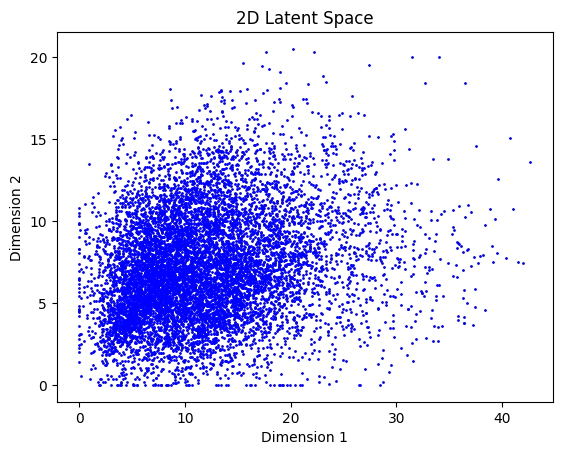

In [5]:
# Encoder model to extract 2D representation
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# Plot compressed data
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', s=1)
plt.title("2D Latent Space")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

## 🧰 Use Case 2: Denoising Images

Train an autoencoder to reconstruct clean images from noisy input images.

Epoch 1/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1269 - val_loss: 0.1170
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1163 - val_loss: 0.1146
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1145 - val_loss: 0.1133
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1135 - val_loss: 0.1128
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1129 - val_loss: 0.1123
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1125 - val_loss: 0.1119
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1122 - val_loss: 0.1119
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1119 - val_loss: 0.1118
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1117 - val_loss: 0.1114
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


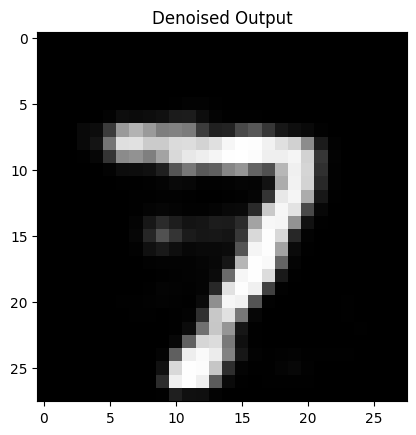

In [6]:
# Add noise to images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train with noisy input but original target
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Visualize results
decoded_imgs = autoencoder.predict(x_test_noisy)
plt.imshow(decoded_imgs[0].reshape(28, 28), cmap='gray')
plt.title("Denoised Output")
plt.show()

## 🧰 Use Case 3: Anomaly Detection

Train an autoencoder on normal data. When you feed in anomalous data, the reconstruction error will be high.

In [7]:
# Calculate reconstruction error
reconstructed = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - reconstructed, 2), axis=1)

# Set threshold based on training data (e.g., 95th percentile)
threshold = np.percentile(mse, 95)

# Identify anomalies
anomalies = mse > threshold
print(f"Detected {np.sum(anomalies)} anomalies out of {len(x_test)} samples")

313/313 [==============================] - 1s 2ms/step
Detected 500 anomalies out of 10000 samples


## 🧰 Use Case 4: Feature Extraction

You can use the encoder part of the autoencoder as a feature extractor for another model (e.g., SVM or clustering).

In [8]:
# Use encoder output as features
features = encoder.predict(x_train)

# Train a classifier (e.g., SVM) on top of features
from sklearn.svm import SVC
labels = np.random.randint(0, 10, len(features))  # Dummy labels for demo
clf = SVC()
clf.fit(features, labels)

print("Classifier trained on autoencoder features")

1875/1875 [==============================] - 2s 1ms/step


KeyboardInterrupt: 